In [116]:
import cmocean.cm as cm
import datetime as dt
import glob
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from salishsea_tools import viz_tools, places

In [2]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
tmask = mesh['tmask']
deptht = mesh['gdept_1d'][0]

In [28]:
ymin, ymax = 450, 475
xmin, xmax = 320, 350

In [159]:
# Choose Locations, lat and lon from picking off google maps

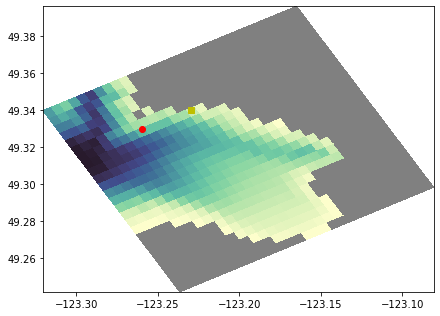

In [161]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
mycmap = cm.deep
mycmap.set_bad('grey')
ax.pcolormesh(bathy.nav_lon[ymin:ymax, xmin:xmax], bathy.nav_lat[ymin:ymax, xmin:xmax], bathy['Bathymetry'][ymin:ymax, xmin:xmax], cmap=mycmap, shading='auto')
viz_tools.set_aspect(ax, coords='map');
plt.plot(-123.23, 49.34, 'ys')
plt.plot(-123.26, 49.33, 'ro');

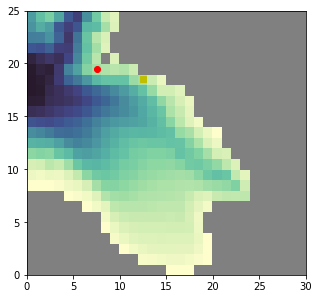

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
mycmap = cm.deep
mycmap.set_bad('grey')
ax.pcolormesh(bathy['Bathymetry'][ymin:ymax, xmin:xmax], cmap=mycmap)
viz_tools.set_aspect(ax);
plt.plot(327-xmin+0.5, 469-ymin+0.5, 'ro')
plt.plot(332-xmin+0.5, 468-ymin+0.5, 'ys');

In [43]:
ysc, xsc = 468, 332
ypa, xpa = 469, 327

In [144]:
def get_phyto_201905(files, yy, xx, nt, nz=10):
    diatoms = np.zeros((nt, nz))
    flagellates = np.zeros((nt, nz))
    mesorub = np.zeros((nt, nz))
    times = []
    for it, file in enumerate(files):
        neutral = xr.open_dataset(file)
        diatoms[it] = neutral.diatoms[0, 0:nz, yy, xx]
        flagellates[it] = neutral.flagellates[0, 0:nz, yy, xx]
        mesorub[it] = neutral.ciliates[0, 0:nz, yy, xx]
        times.append(neutral.time_centered[0].values)
        neutral.close()
    return diatoms, flagellates, mesorub, times  

In [128]:
def get_phyto_202111(files, yy, xx, nt, nz=10):
    diatoms = np.zeros((nt, nz))
    flagellates = np.zeros((nt, nz))
    mesorub = np.zeros((nt, nz))
    times = []
    for it, file in enumerate(files):
        neutral = xr.open_dataset(file)
        diatoms[it] = neutral.diatoms[0, 0:nz, yy, xx]
        flagellates[it] = neutral.flagellates[0, 0:nz, yy, xx]
        times.append(neutral.time_counter[0].values)
        neutral.close()
    return diatoms, flagellates, times  

In [152]:
def plot_201905(times2, diatoms2, flagellates2, mesorub2, title):
    fig, axs = plt.subplots(3, 1, figsize=(25, 15))
    cb = [0, 1, 2]
    colours = axs[0].pcolormesh(times2, deptht[0:nz], np.array(diatoms2).transpose(), shading='auto', norm=colors.LogNorm(vmin=0.01, vmax=10),cmap=cm.algae)
    axs[0].set_title(f'Diatoms: {title}, v201905')
    cb[0] = fig.colorbar(colours, ax=axs[0])
    colours = axs[1].pcolormesh(times2, deptht[0:nz], np.array(flagellates2).transpose(), shading='auto', norm=colors.LogNorm(vmin=0.01, vmax=10),cmap=cm.algae)
    axs[1].set_title(f'Flagellates: {title}, v201905')
    cb[1] = fig.colorbar(colours, ax=axs[1])
    colours = axs[2].pcolormesh(times2, deptht[0:nz], np.array(mesorub2).transpose(), shading='auto', norm=colors.LogNorm(vmin=0.01, vmax=10),cmap=cm.algae)
    axs[2].set_title(f'Mesodinium rubrum: {title}, v201905')
    cb[2] = fig.colorbar(colours, ax=axs[2])
    for ax in axs:
        ax.invert_yaxis();
    for cc in cb:
        cc.set_label('uM N')

In [141]:
def plot_202111(times11, diatoms11, flagellates11, title):
    fig, axs = plt.subplots(2, 1, figsize=(25, 10))
    cb = [0, 1]
    colours = axs[0].pcolormesh(times11, deptht[0:nz], np.array(diatoms11).transpose(), shading='auto', norm=colors.LogNorm(vmin=0.1, vmax=10),cmap=cm.algae)
    axs[0].set_title(f'Diatoms: {title}, v202111')
    cb[0] = fig.colorbar(colours, ax=axs[0])
    colours = axs[1].pcolormesh(times11, deptht[0:nz], np.array(flagellates11).transpose(), shading='auto', norm=colors.LogNorm(vmin=0.1, vmax=10),cmap=cm.algae)
    axs[1].set_title(f'Flagellates: {title}, v202111')
    cb[1] = fig.colorbar(colours, ax=axs[1])
    for ax in axs:
        ax.invert_yaxis();
    for cc in cb:
        cc.set_label('uM N')

In [129]:
files = sorted(glob.glob('/results2/SalishSea/nowcast-green.202111/?????22/SalishSea_1d*biol*.nc'))
nz = 20
diatoms, flagellates, times = get_phyto_202111(files, ypa, xpa, 365, nz=nz)

In [130]:
times11, diatoms11 = zip(*sorted(zip(times, diatoms)))
times11, flagellates11 = zip(*sorted(zip(times, flagellates)))

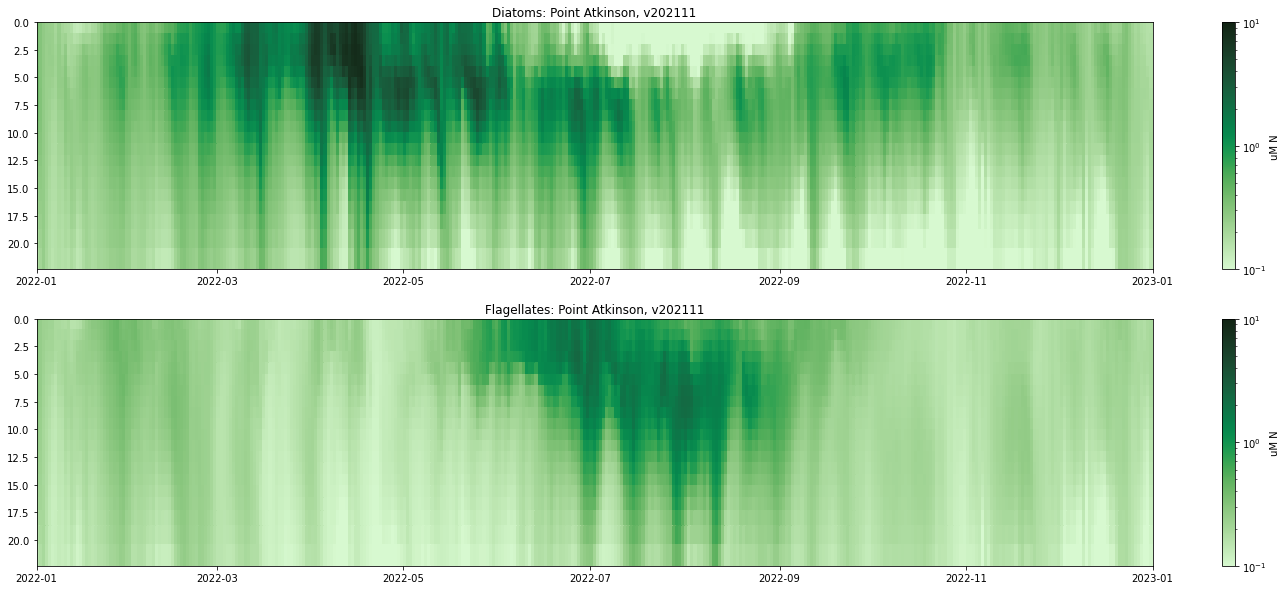

In [142]:
plot_202111(times11, diatoms11, flagellates11, 'Point Atkinson')

In [139]:
files = sorted(glob.glob('/results2/SalishSea/nowcast-green.202111/?????22/SalishSea_1d*biol*.nc'))
nz = 20
diatoms, flagellates, times = get_phyto_202111(files, ysc, xsc, 365, nz=nz)

In [140]:
times12, diatoms12 = zip(*sorted(zip(times, diatoms)))
times12, flagellates12 = zip(*sorted(zip(times, flagellates)))

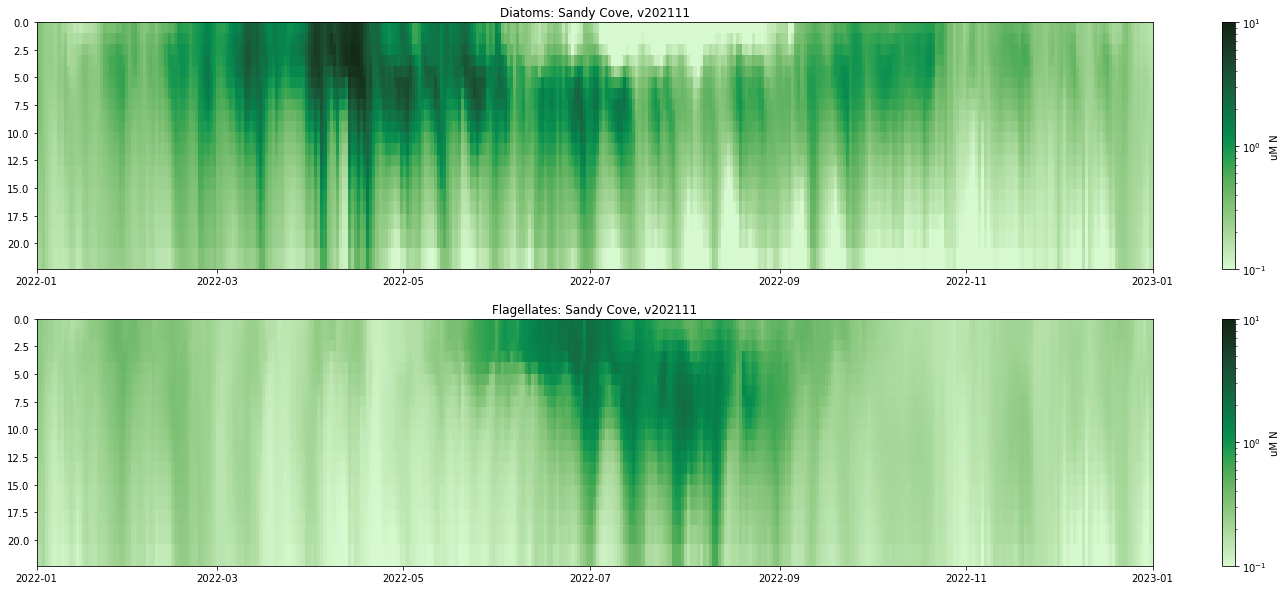

In [143]:
plot_202111(times12, diatoms12, flagellates12, 'Sandy Cove')

In [145]:
files = sorted(glob.glob('/results2/SalishSea/nowcast-green.201905/?????22/SalishSea_1d*ptrc*.nc'))
nz = 20
diatoms, flagellates, mesorub, times = get_phyto_201905(files, ypa, xpa, 365, nz=nz)

In [150]:
times1, diatoms1 = zip(*sorted(zip(times, diatoms)))
times1, flagellates1 = zip(*sorted(zip(times, flagellates)))
times1, mesorub1 = zip(*sorted(zip(times, mesorub)))

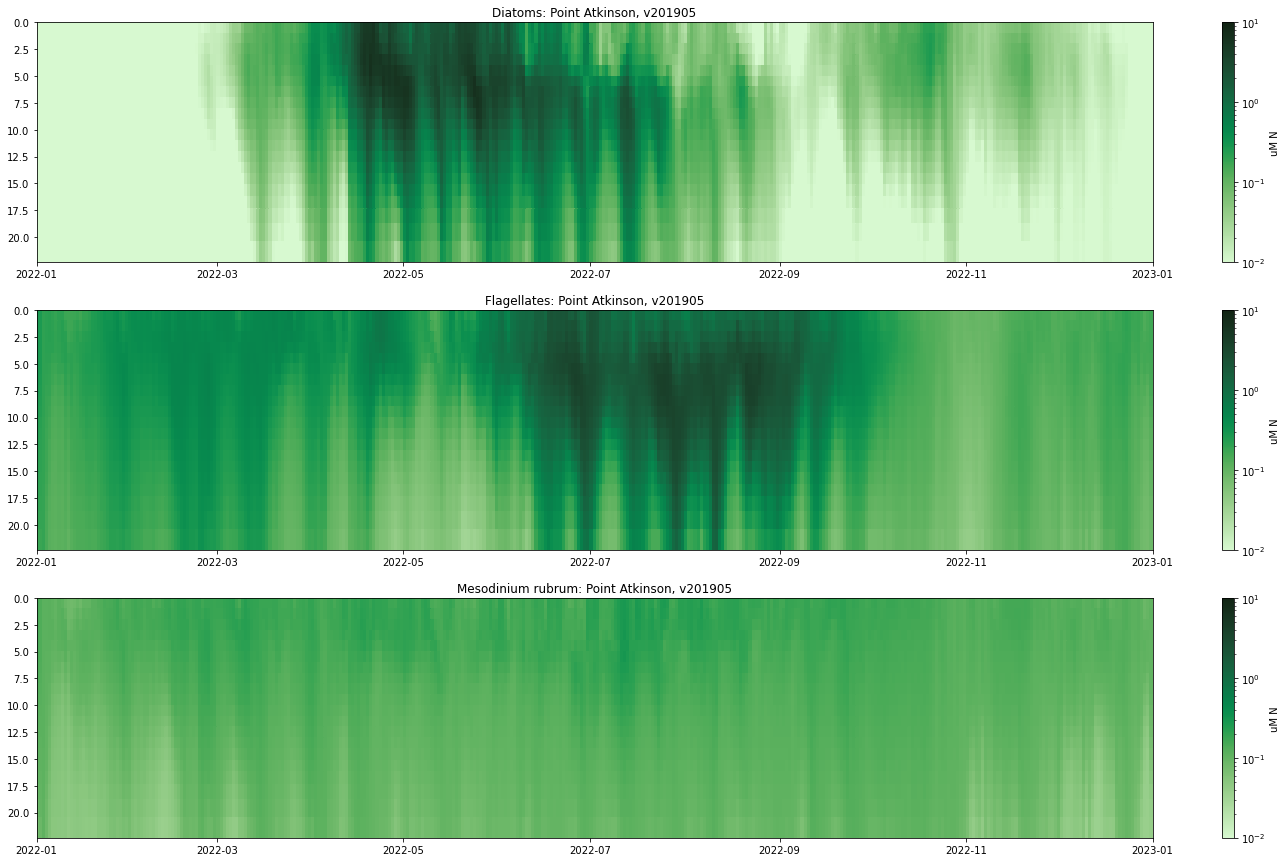

In [153]:
plot_201905(times1, diatoms1, flagellates1, mesorub1, 'Point Atkinson')

In [154]:
files = sorted(glob.glob('/results2/SalishSea/nowcast-green.201905/?????22/SalishSea_1d*ptrc*.nc'))
nz = 20
diatoms, flagellates, mesorub, times = get_phyto_201905(files, ysc, xsc, 365, nz=nz)

In [155]:
times2, diatoms2 = zip(*sorted(zip(times, diatoms)))
times2, flagellates2 = zip(*sorted(zip(times, flagellates)))
times2, mesorub2 = zip(*sorted(zip(times, mesorub)))

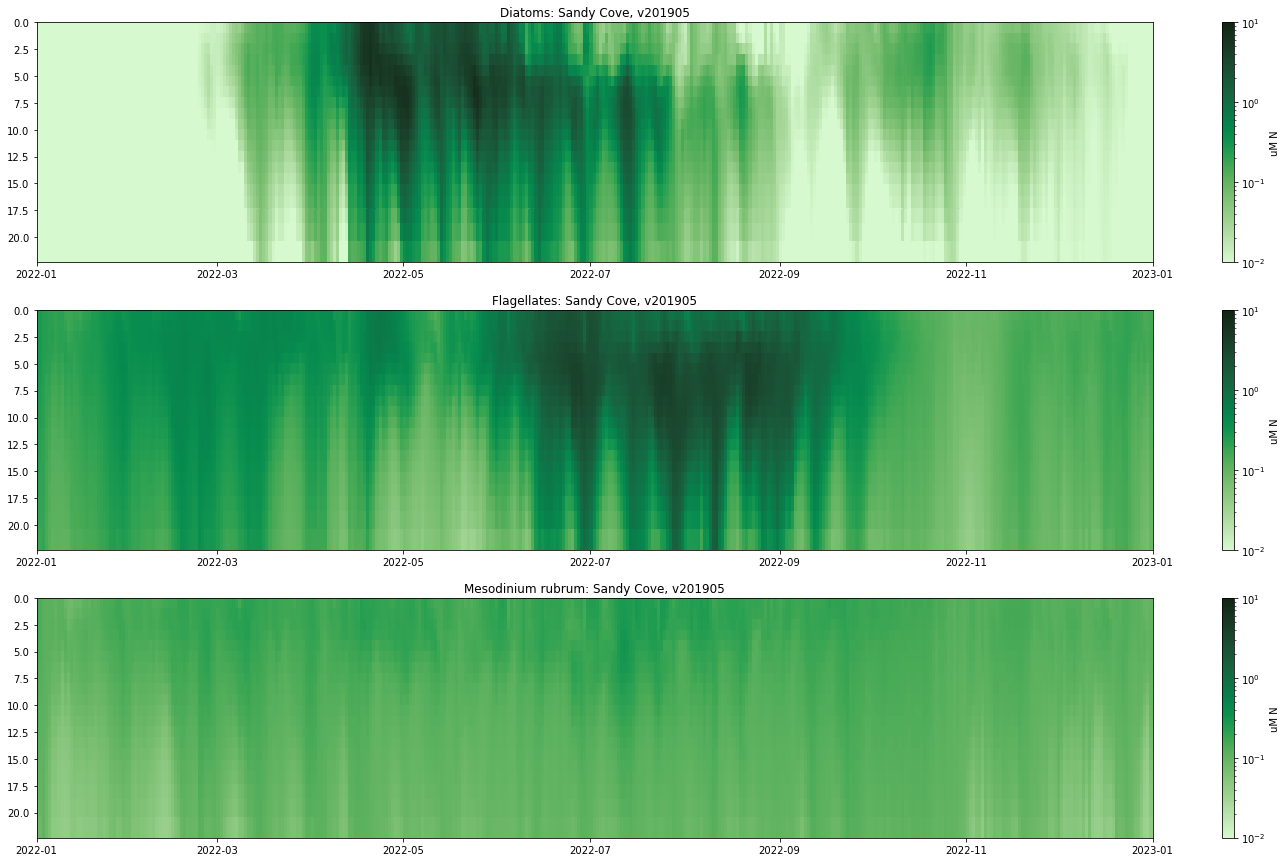

In [156]:
plot_201905(times2, diatoms2, flagellates2, mesorub2, 'Sandy Cove')